# Les K plus proches voisins & Arbres de décision 

## Partie I: K plus proches voisins (KNN : k nearest neighbors)

##A. Algorithme
Le KNN est un algorithme de classification supervisé. Pour chaque entrée $x_{i}=(x^{1}_{i}, x^{1}_{i}, x^{2}_{i}, ... x^{n}_{i}) $ il faut disposer de la sortie $y_{i}$ correspondante (la classe correspondante)

Pour savoir à quelle classe $y_{i}$ un vecteur x apartient il faut:
- Calculer la distance (euclidienne) du vecteur x à tous les examples $x_{i}$
- trouver les k exemple les plus proche de x
- x appartient à la classe majoritairement representé par ces k éléments 

####Q1. utilisez la fonction ***make_blobs(n_samples,centers, cluster_std,random_state)*** du module ***sklearn.datasets*** pour generer trois classes puis visualiser ces trois classe comme suivants:
*   rouge: y=0
*   blue: y=1
*   vert: y=2
*   Orange: y=3
l'argument ***cluster_std*** affecte le chevauchement entre les classe

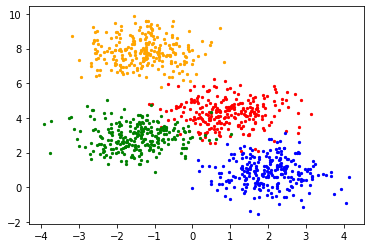

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

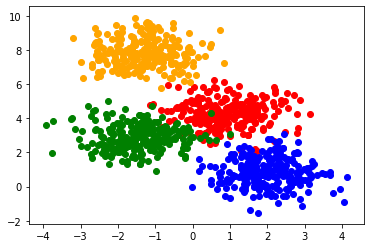

In [22]:
X , y = make_blobs(n_samples = 1000 , centers = 4 , cluster_std = 0.8, random_state=0)

colors = ['red' ,'blue' ,'green' ,'orange']
for k,col in enumerate(colors):
    data= y == k
    plt.scatter(X[data,0] , X[data,1] ,c=col)

####Q2. Ecrire une fonction knn(x,X_train,y_train,k) pour predire la classe de x avec l'algorithme du kNN 

In [82]:
from math import sqrt
import pandas as pd
def knn(x , X_train , y_train , k):
    distance=[]
    neighbours=[]
    category={}
    for e in X_train:
        distance.append(sqrt ( (x[0]-e[0])**2 + (x[1]-e[1])**2 ))
    df = pd.DataFrame({"X1":X_train[:,0] , "X2":X_train[:,1] , "y":y_train , 
                       "distance":distance}).sort_values(by="distance" , ascending=False)
    for i in range(k):
        neighbours.append(df["y"][k])
    for e in neighbours:
        if e not in category:
            category[e]=neighbours.count(e)
    
    values=list(category.values())
    key=list(category.keys())
    
    return key[values.index(max(values))]
                         

####Q3. A quelle classe apartient les trois points suivants: x1=(-2,5); x2(-1,6) et x3=(0,2) pour k=3,5 et 7 respectivement

In [88]:
x1 = [-2,5]
x2 = [-1,6]
X3 = [0,2]

print("category x1,k=3: ",knn(x1,X,y,3))
print("category x1,k=5: ",knn(x1,X,y,5))
print("category x1,k=7: ",knn(x1,X,y,7))

print("category x2,k=3: ",knn(x2,X,y,3))
print("category x2,k=5: ",knn(x2,X,y,5))
print("category x2,k=7: ",knn(x2,X,y,7))


category x1,k=3:  2
category x1,k=5:  0
category x1,k=7:  1
category x2,k=3:  2
category x2,k=5:  0
category x2,k=7:  1


##B. Utilisation des modules python
Le module ***KNeighborsClassifier*** de ***sklearn.neighbors*** permet de initialiser un modele kNN avec un parametre k ***KNeighborsClassifier(k)*** en entraine ce modele avce la sa méthode ***fit(x_train,y_train)*** puis la prediction avec sa methode ***predict(x)***
####Q1. Utiliser 75% des données precedentes pour entrainer ce modèle puis afficher la matrice de confusion et la precision de ce modèle pour k=1, 3, 5 ... 11
Utiliser la méthode accuracy_score(y_test, y_pred) de sklearn.metrics pour calculer la precision (accuracy) du modèle

In [44]:
from sklearn.neighbors import KNeighborsClassifier


####Q2. Trace la precision de ce modele en fonction de k. quel valeur de k choisir pour ce problème?

